# グラフ上の量子ウォーク

# グラフの準備
サンプルとしてMutag dataset[1] を用いる

[1]Debnath, A. K., Lopez de Compadre, R. L., Debnath, G., Shusterman, A. J., Hansch, C.: Structure-activity relationship of mutagenic aromatic and heteroaromatic nitro compounds. correlation with molecular orbital energies and hydrophobicity, Journal of Medicinal Chemistry, 34(2), 786-797 (1991) http://pubs.acs.org/doi/abs/10.1021/jm00106a046.

In [1]:
from grakel import datasets
data_name = 'MUTAG'
Data = datasets.fetch_dataset(data_name, verbose=False)

/Users/parton/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
import numpy as np
data_x, data_y = np.array(Data.data), np.array(Data.target)

Mutagのグラフは以下のようにエッジとして保存されている

In [3]:
print(data_x[0][0])

{(15, 13), (10, 11), (5, 6), (9, 8), (2, 1), (14, 13), (8, 9), (15, 16), (1, 6), (14, 9), (17, 15), (1, 2), (11, 10), (13, 12), (12, 13), (16, 15), (3, 4), (10, 9), (4, 10), (3, 2), (5, 4), (9, 14), (10, 4), (4, 5), (13, 15), (9, 10), (7, 5), (2, 3), (8, 7), (12, 11), (11, 12), (6, 5), (15, 17), (13, 14), (6, 1), (5, 7), (4, 3), (7, 8)}


In [4]:
mutag_data = list(data_x[0][0])

### サンプルの可視化

In [5]:
from QC4QWG import *
import scipy as sp
import networkx as nx
G= nx.Graph()
G.add_edges_from(mutag_data)
#G.add_edges_from([(0, 1), (0, 2),(1,2)])
# G.add_edges_from([(0, 1), (0, 4), (0, 5), (1, 0), (1, 2), (1, 4), (1, 5), (2, 1), (2, 3), (2, 5), (2, 6),(3, 2), (3, 6), 
#                   (4, 0), (4, 1), (4, 5), (4, 8), (4, 9), (4, 10),(5, 0), (5, 1), (5, 2), (5, 4), (5, 6), (5, 9), (5, 10),
#                   (6, 2), (6, 3), (6, 5), (6, 10),(8, 4), (8, 11), (9, 4), (9, 5), (9, 10), (9, 11),
#                   (10, 4), (10, 5), (10, 6), (10, 9), (10,11),(11, 8), (11, 9)])

qc1 =QC4QWG(G,1)

binary_nodeA_zero
01111
edge_number_zero
11
binary_nodeA_zero
01111
edge_number_zero
1
binary_nodeA_zero
01111
edge_number_zero
1
binary_nodeA_zero
01101
edge_number_zero
1
binary_nodeA_zero
01101
edge_number_zero
1
binary_nodeA_zero
00101
edge_number_zero
11
binary_nodeA_zero
00101
edge_number_zero
1
binary_nodeA_zero
00101
edge_number_zero
1
binary_nodeA_zero
01011
edge_number_zero
1
binary_nodeA_zero
00101
edge_number_zero
11
binary_nodeA_zero
00101
edge_number_zero
1
binary_nodeA_zero
00101
edge_number_zero
1
binary_nodeA_zero
00011
edge_number_zero
1
binary_nodeA_zero
01001
edge_number_zero
1
binary_nodeA_zero
01001
edge_number_zero
1
binary_nodeA_zero
00001
edge_number_zero
1
binary_nodeA_zero
00001
edge_number_zero
1
binary_nodeA_zero
00001
edge_number_zero
1
binary_nodeA_zero
00011
edge_number_zero
1
op
['0111111', [Qubit(QuantumRegister(5, 't0'), 0), Qubit(QuantumRegister(5, 't0'), 1), Qubit(QuantumRegister(5, 't0'), 2), Qubit(QuantumRegister(5, 't0'), 3), Qubit(QuantumRegiste

QiskitError: 'The amount of control qubit does not match the length of binaries.'

In [2]:
qc1.draw()

OrderedDict([('x', 4), ('h', 3), ('crz', 2), ('cu3', 2), ('ccx', 2), ('bmx', 2)])


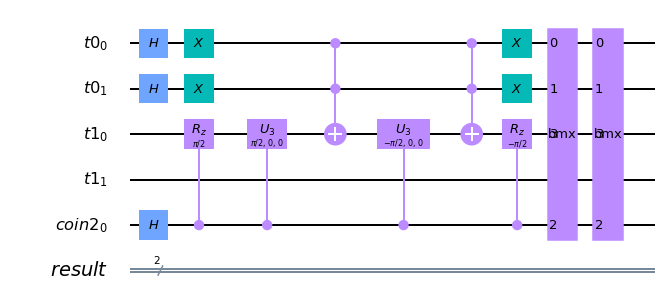

In [3]:
from qiskit.transpiler import PassManager
from CongX.transpiler.passes.unroll_cong import UnrollCong
# Unroll the circuit
pass_ = UnrollCong()
pm = PassManager(pass_)
new_circuit = pm.run(qc1) 
new_circuit.draw(output='mpl')
# obtain gates
gates=new_circuit.count_ops()
print(gates)
new_circuit.draw(output='mpl')

OrderedDict([('x', 8), ('crz', 4), ('cu3', 4), ('ccx', 4), ('h', 3), ('bmx', 1)])


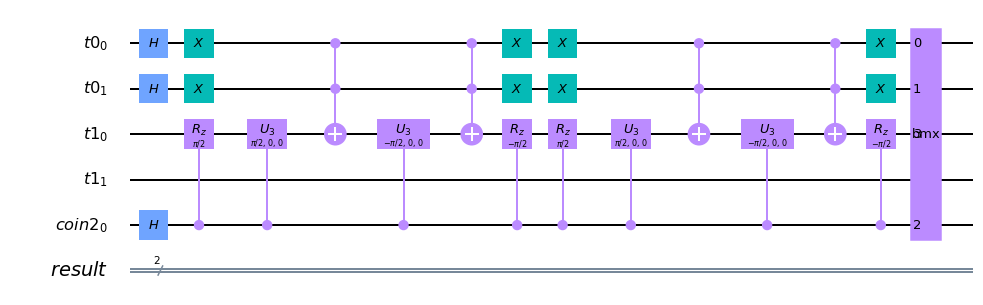

In [4]:
from qiskit.transpiler import PassManager
from CongX.transpiler.passes.unroll_cong import UnrollCong
# Unroll the circuit
pass_ = UnrollCong()
pm = PassManager(pass_)
new_circuit = pm.run(new_circuit) 
new_circuit.draw(output='mpl')
# obtain gates
gates=new_circuit.count_ops()
print(gates)
new_circuit.draw(output='mpl')

OrderedDict([('x', 10), ('crz', 6), ('cu3', 6), ('ccx', 6), ('h', 3)])


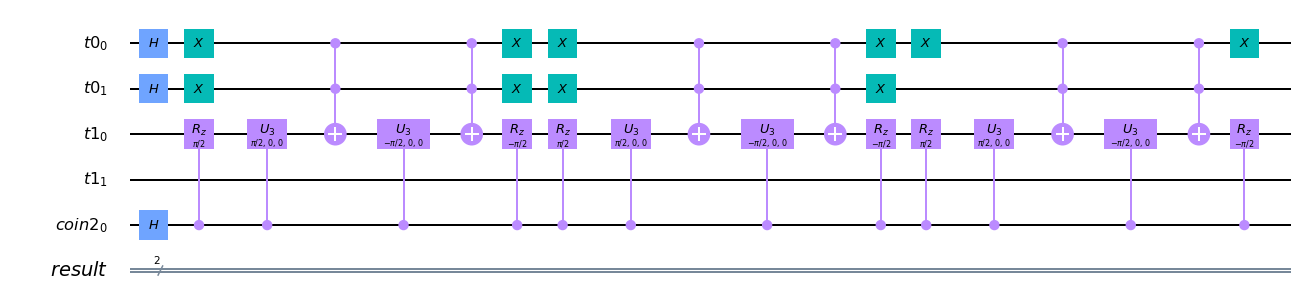

In [5]:
from qiskit.transpiler import PassManager
from CongX.transpiler.passes.unroll_cong import UnrollCong
# Unroll the circuit
pass_ = UnrollCong()
pm = PassManager(pass_)
new_circuit = pm.run(new_circuit) 
new_circuit.draw(output='mpl')
# obtain gates
gates=new_circuit.count_ops()
print(gates)
new_circuit.draw(output='mpl')

In [5]:
from qiskit.transpiler.passes import Unroller
from qiskit.transpiler.passes import Optimize1qGates
# Unroll the circuit
pass_ = Unroller(['u3', 'cx', 'h', 'x', 'ccx'])
pm = PassManager(pass_)
pass_ = Optimize1qGates()
pm = PassManager(pass_)
new_circuit = pm.run(qc1) 
new_circuit.draw(output='mpl')
# obtain gates
gates=new_circuit.count_ops()
print(gates)

OrderedDict([('bmx', 3), ('h', 2)])


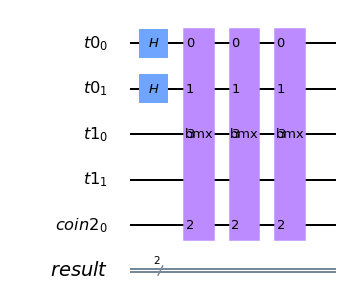

In [6]:
new_circuit.draw(output='mpl')